In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import requests
import json
from datetime import datetime

In [2]:
# Reading the final dataset NYbike_trips_Q3.csv

filepath = '/Users/vineetasinha/Documents/workspace/NYCitiBike/CleanedBikeTrips_Q1.csv'
df_NYTrips_Q1 = pd.read_csv(filepath)


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_43312/2887621871.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NYTrips_Q1 = pd.read_csv(filepath)


In [3]:
df_NYTrips_Q1.shape

(6312589, 18)

In [4]:
df_NYTrips_Q1.dtypes


ride_id                object
rideable_type          object
started_at            float64
ended_at              float64
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Date                   object
AvgTemp               float64
_merge                 object
tripduration          float64
log_tripduration      float64
dtype: object

In [5]:
# Count missing values per column
missing_values_count = df_NYTrips_Q1.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
Date                  0
AvgTemp               0
_merge                0
tripduration          0
log_tripduration      0
dtype: int64


In [6]:
# Picking theme & setting for all the plots

# Set the overall style
sns.set(style="darkgrid")

# Set the color palette
sns.set_palette("muted")



In [8]:
top_20_stations = df_NYTrips_Q1['start_station_name'].value_counts().head(20)

# Convert to a DataFrame for easy plotting
top_20_stations_df = pd.DataFrame({
    'start_station_name': top_20_stations.index,
    'count': top_20_stations.values
})

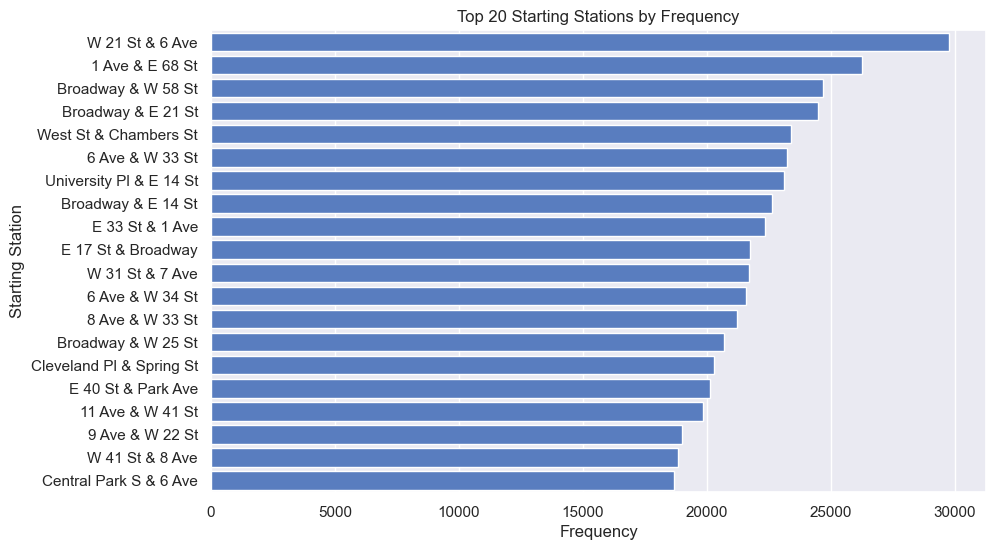

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_stations_df, x='count', y='start_station_name')
plt.title('Top 20 Starting Stations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Starting Station')
plt.show()

After plotting the chart I realized the color palette I chose in the previous step lacked color diversity and did not suit the data. After evaluating I decided to override the color palette temporarily for the specific plot in the next step.

/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_43312/1201215894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_stations_df, x='count', y='start_station_name', palette='tab20')


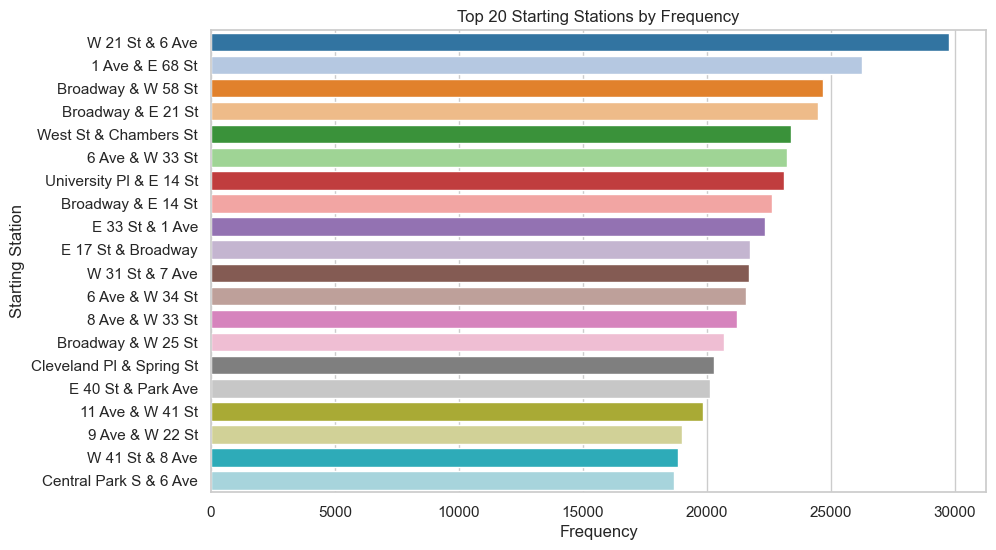

In [10]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_20_stations_df, x='count', y='start_station_name', palette='tab20')
    plt.title('Top 20 Starting Stations by Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Starting Station')
    plt.show()

In [11]:
daily_trips_q1 = pd.DataFrame(df_NYTrips_Q1.groupby(['Date'])['ride_id'].count()).reset_index()

In [13]:
# rename a column in the daily_trips_q2 from ride_id to bike_rides_daily
daily_trips_q1.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

# merging two DataFrames (df_NYTrips_Q2 and daily_trips_q2) on a common column, 'Date', while renaming a column from daily_trips_q1 in the process. The merge is performed using an outer join, and an additional column called 'merge_indicator' is added to indicate the source of each row.
df_2022_Q1 = df_NYTrips_Q1.merge(daily_trips_q1.rename(columns = {'trip_id':'bike_rides_daily'}), on = 'Date', how = 'outer', indicator = 'merge_indicator')


In [14]:
print(df_2022_Q1['_merge'].value_counts(dropna = False))


_merge
both    6312589
Name: count, dtype: int64


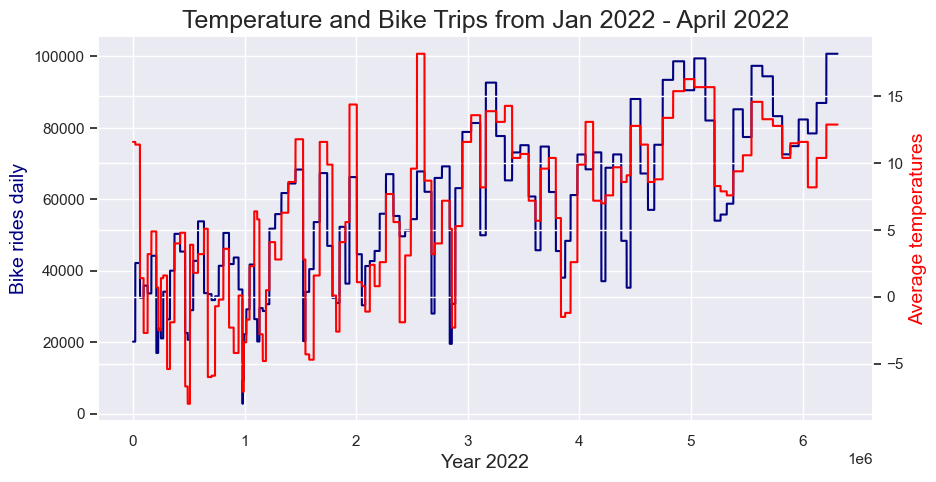

In [16]:

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of bike rides using Seaborn
sns.lineplot(data=df_2022_Q1, x=df_2022_Q1.index, y='bike_rides_daily', ax=ax, color="navy")
ax.set_xlabel("Year 2022", fontsize=14)  # Set x-axis label
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)  # Set y-axis label

# Create a second axis for the temperatures
ax2 = ax.twinx()

# Make a plot of temperatures using Seaborn on the second y-axis
sns.lineplot(data=df_2022_Q1, x=df_2022_Q1.index, y='AvgTemp', ax=ax2, color="red")
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)  # Set second y-axis label

# Set title
plt.title('Temperature and Bike Trips from Jan 2022 - April 2022', fontsize=18)

# Display the plot
plt.show()


Seasonal Impact
---------------------

January and February: These months are typically cold, which might be reflected in a lower number of bike trips. If the plot shows a steady increase in bike rides as the temperature rises, this would suggest that warmer temperatures encourage more bike trips.
March to April: As the weather warms up, there is an uptick in bike trips. This period marks the transition from winter to spring, where increasing temperatures can lead to more outdoor activities, including biking.

Temperature Influence
-----------------------
Positive Correlation: If the bike rides line increases alongside rising temperatures, this indicates a positive correlation between warmer weather and increased bike usage.
Sudden Drops or Spikes: If there are sudden drops in bike trips that coincide with cold spells or days of extreme temperatures, it suggests that unfavorable weather conditions discourage biking.


In [17]:
df_2022_Q1.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AvgTemp,_merge,tripduration,log_tripduration,bike_rides_daily,merge_indicator
0,D09109AEB47FEEA9,classic_bike,1.641055e+12,1.643920e+12,Picnic Point,4374.01,E 16 St & 5 Ave,6022.04,40.685126,-74.025353,40.737262,-73.992390,casual,2022-01-01,11.6,both,47755.968617,10.773880,20198,both
1,ECDFB9C97FAF0F35,classic_bike,1.641044e+12,1.641045e+12,W 13 St & 7 Ave,6030.04,Great Jones St,5636.11,40.737815,-73.999947,40.727434,-73.993790,casual,2022-01-01,11.6,both,7.337883,2.120809,20198,both
2,22F675B5C5A666FD,classic_bike,1.640996e+12,1.641000e+12,W 42 St & Dyer Ave,6644.07,West St & Chambers St,5329.03,40.758985,-73.993800,40.717548,-74.013221,casual,2022-01-01,11.6,both,61.556117,4.136064,20198,both


In [18]:
# Check the unique values of rideable_type
print(df_2022_Q1['rideable_type'].value_counts())

# Check the range of tripduration
print(df_2022_Q1['tripduration'].describe())


rideable_type
classic_bike     3798568
electric_bike    2514021
Name: count, dtype: int64
count    6.312589e+06
mean     1.453712e+01
std      9.215457e+01
min      1.000267e+00
25%      5.535917e+00
50%      9.517250e+00
75%      1.658343e+01
max      7.583808e+04
Name: tripduration, dtype: float64


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_43312/3920249002.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2022_Q1, x='rideable_type', y='log_tripduration', palette = my_colors)


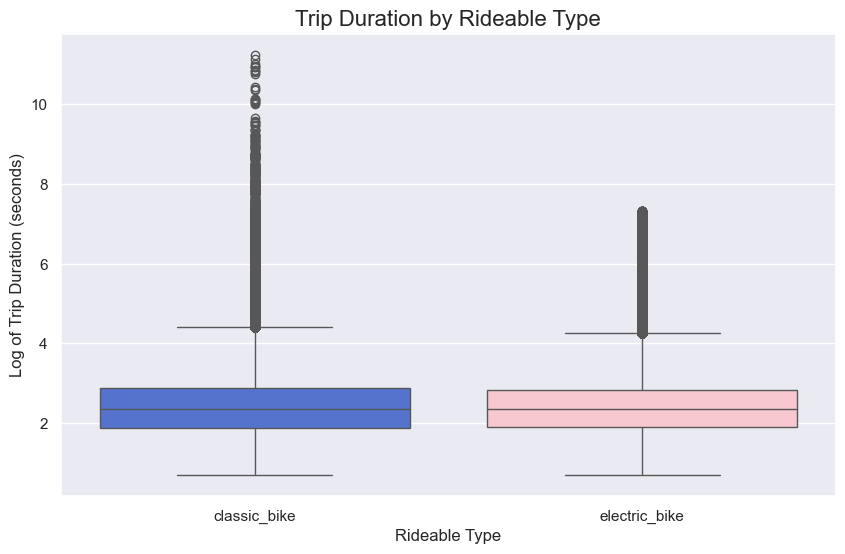

In [19]:
# Optional: If tripduration has extreme values, you can use log transformation for better visibility
df_2022_Q1['log_tripduration'] = df_2022_Q1['tripduration'].apply(lambda x: np.log(x + 1))

# Create the box plot
plt.figure(figsize=(10, 6))
my_colors = {'classic_bike': 'royalblue', 'electric_bike': 'pink'}

sns.boxplot(data=df_2022_Q1, x='rideable_type', y='log_tripduration', palette = my_colors)

# Set labels and title
plt.xlabel('Rideable Type', fontsize=12)
plt.ylabel('Log of Trip Duration (seconds)', fontsize=12)
plt.title('Trip Duration by Rideable Type', fontsize=16)

# Show the plot
plt.show()


Observation
--------------------
Log Transformation: Applying a log transformation to tripduration can make it easier to visualize if there are extreme values. Adding 1 before logging avoids issues with zero values.

Categorical Values: Making sure rideable_type is properly categorized. The box plot should now display how trip durations vary across different bike types more clearly.

The box plot helped visualizing the distribution of trip durations for classic and electric bikes, highlighting outliers.It is quite clear that the classic bike has more outliers as compaired to electric bike

A FacetGrid can be very useful for comparing distributions and patterns across different subsets of your data. For project, you might use FacetGrid to create multiple plots for bike trip durations, separated by bike type or user type. This would allow us to visualize and compare the distributions of trip durations across these categories side-by-side.

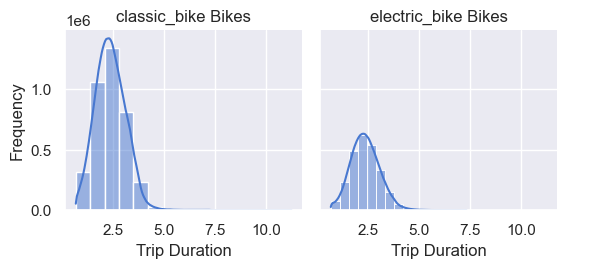

In [20]:
# Initialize a FacetGrid with 'rideable_type' as the columns
g = sns.FacetGrid(df_2022_Q1, col='rideable_type', margin_titles=True)

# Map a histogram of 'tripduration' to each subplot
g.map_dataframe(sns.histplot, x='log_tripduration', bins=15, kde=True)

# Add titles and labels
g.set_axis_labels('Trip Duration', 'Frequency')
g.set_titles(col_template="{col_name} Bikes")
g.add_legend()

plt.show()


Analysis:
---------------
Distribution Comparison - The FacetGrid allows you to compare the distribution of trip durations between classic and electric bikes in a single view. For instance, if classic bikes have a wider range and more frequent long-duration trips compared to electric bikes, this could indicate differences in usage patterns or user preferences.

Identifying Patterns - By including the KDE (Kernel Density Estimate) in the histogram, you can observe the smooth distribution of trip durations. This helps in understanding if there are more significant peaks or clusters in one bike type over the other.

Outlier Identification - The histograms can help identify if one bike type has more extreme values or outliers in trip duration, providing insight into potential anomalies or unique usage patterns specific to that bike type.


Interpreting the distribution differences
---------------------------------------------

Classic Bikes: If the histogram for classic bikes shows a peak at a certain trip duration, this suggests that most trips using classic bikes tend to be around that duration. The peak might represent common commuting or leisure trips that fall within a typical duration.

Electric Bikes: The distribution for electric bikes might show a different pattern, potentially with shorter or longer durations depending on how these bikes are used. Electric bikes, being faster, might show a peak at shorter trip durations compared to classic bikes, as they allow riders to cover the same distance in less time.

Optimizing Bike Allocation
--------------------------------

Balanced Distribution - Understanding the typical trip duration can help in balancing bike distribution across stations. For instance, if classic bikes are more frequently used for longer trips, they might need to be more available in suburban areas, while electric bikes could be more concentrated in city centers for short trips.

Station Location and Size - Peaks in certain trip durations might suggest the need for additional or larger stations in areas where trips typically start or end. For example, if many long trips begin or end at certain stations, those stations might need more bikes or docks to accommodate the demand.

In [21]:
df_2022_Q1.to_csv('/Users/vineetasinha/Documents/workspace/NYCitiBike/BikeTripsVisualizations_Q1.csv', index=False)
